In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'CRBN RMSD (nm)')

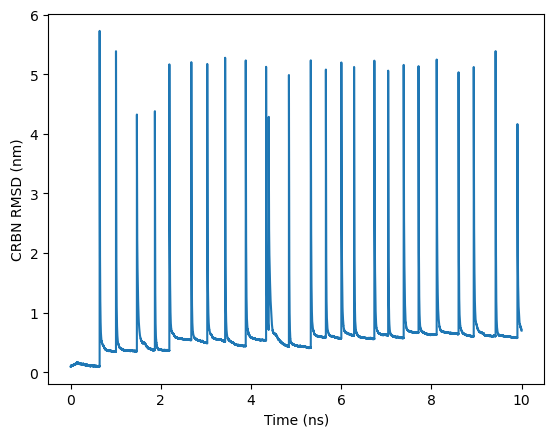

In [23]:
CVs = np.loadtxt('run3/rmsd.txt')[:, 1]
time = np.linspace(0, 10, len(CVs))
plt.plot(time, CVs)
plt.xlabel('Time (ns)')
plt.ylabel('CRBN RMSD (nm)')

In [20]:
import MDAnalysis as mda

u = mda.Universe('complex_eq.prmtop', 'run1/traj.dcd')

receptor = u.select_atoms('protein and resid 1 to 312')
ligand = u.select_atoms('protein and resid 314 to 606')

COM_separation = []

for ts in u.trajectory:

    receptor_COM = receptor.center_of_mass()
    ligand_COM = ligand.center_of_mass()

    COM_separation.append(np.linalg.norm(ligand_COM - receptor_COM))

/home/btan/miniconda3/envs/openbiosim/lib/python3.11/site-packages/MDAnalysis/topology/TOPParser.py:342: UserWarning: Unknown ATOMIC_NUMBER value found for some atoms, these have been given an empty element record. If needed these can be guessed using universe.guess_TopologyAttrs(to_guess=['elements']).
  warnings.warn(msg)
/home/btan/miniconda3/envs/openbiosim/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


Text(0.5, 0, 'Time (ns)')

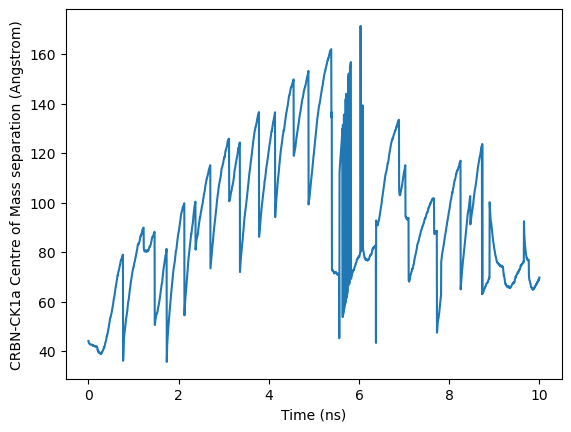

In [25]:
t = np.linspace(0,10,len(COM_separation))

plt.plot(t, COM_separation)
plt.ylabel('CRBN-CK1a Centre of Mass separation (Angstrom)')
plt.xlabel('Time (ns)')

In [40]:
import BioSimSpace as BSS
import sire as sr

In [41]:
mols = BSS.IO.readMolecules(["complex_eq.prmtop", "complex_eq.inpcrd"])

In [ ]:
!pdb4amber --reduce --dry --add-missing-atoms -o 1UBQ_dry_wt.pdb 1UBQ.pdb

In [47]:
CRBN_1.getResidues()

[<BioSimSpace.Residue: name='GLU', molecule=193927, index=0, nAtoms=17>,
 <BioSimSpace.Residue: name='THR', molecule=193927, index=1, nAtoms=14>,
 <BioSimSpace.Residue: name='LEU', molecule=193927, index=2, nAtoms=19>,
 <BioSimSpace.Residue: name='MET', molecule=193927, index=3, nAtoms=17>,
 <BioSimSpace.Residue: name='ASP', molecule=193927, index=4, nAtoms=12>,
 <BioSimSpace.Residue: name='ARG', molecule=193927, index=5, nAtoms=24>,
 <BioSimSpace.Residue: name='ILE', molecule=193927, index=6, nAtoms=19>,
 <BioSimSpace.Residue: name='LYS', molecule=193927, index=7, nAtoms=22>,
 <BioSimSpace.Residue: name='LYS', molecule=193927, index=8, nAtoms=22>,
 <BioSimSpace.Residue: name='GLN', molecule=193927, index=9, nAtoms=17>,
 <BioSimSpace.Residue: name='LEU', molecule=193927, index=10, nAtoms=19>,
 <BioSimSpace.Residue: name='ARG', molecule=193927, index=11, nAtoms=24>,
 <BioSimSpace.Residue: name='GLU', molecule=193927, index=12, nAtoms=15>,
 <BioSimSpace.Residue: name='TRP', molecule=1939

In [42]:
CRBN_0 = mols[0]
CRBN_1 = mols[1]
CK1a = mols[2]